From: https://github.com/alisher13/Stock-Market-Anomalies/blob/0d0b7c10b544a357adeacdb81036da2c08bc491e/all_anomalies.ipynb

In [152]:
import pandas as pd
import matplotlib
# matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

In [153]:
nq = pd.read_csv('IXIC.csv')

In [154]:
nq['percent_change'] = nq['Close'].pct_change()

In [155]:
nq['variance'] = nq['Close'] - (nq['Close']/(nq['percent_change']+1))

In [156]:
nq['Date']=pd.to_datetime(nq['Date'])

In [157]:
nq['weekday'] = nq['Date'].dt.dayofweek

In [158]:
nq = nq[~(nq['Date'] < '2000-01-01')]

In [159]:
nq.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percent_change,variance,weekday
7075,2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000,0.015197,61.839843,0
7076,2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000,-0.055544,-229.459961,1
7077,2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000,-0.006190,-24.149902,2
7078,2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000,-0.038790,-150.410156,3
7079,2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000,0.041718,155.490234,4


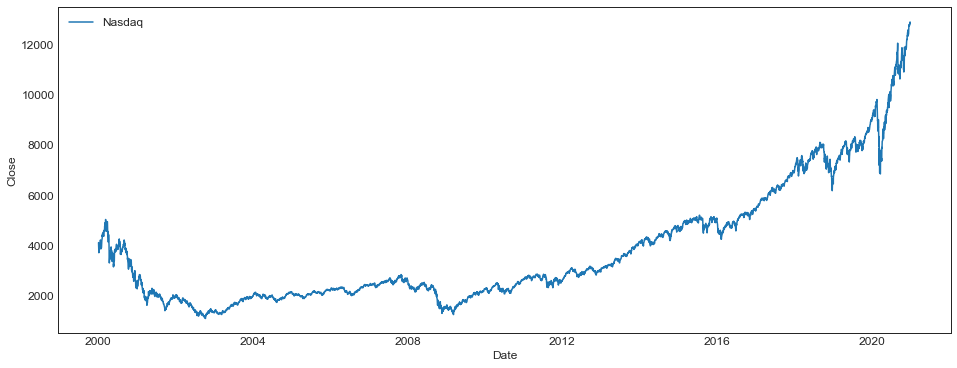

In [160]:
fig = plt.figure(figsize=(16, 6))
plt.plot(nq['Date'], nq['Close'], label="Nasdaq")

plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(loc = 2)

plt.show()

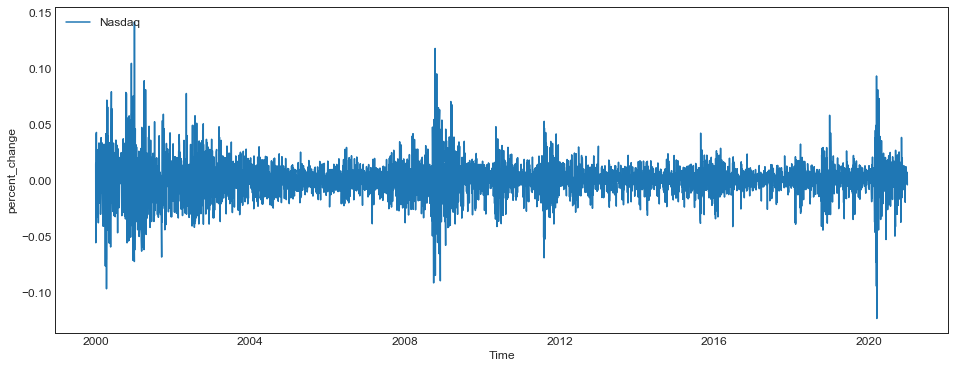

In [161]:
fig = plt.figure(figsize=(16, 6))
plt.plot(nq['Date'], nq['percent_change'], label="Nasdaq")

plt.xlabel('Time')
plt.ylabel('percent_change')
plt.legend(loc = 2)

plt.show()

In [162]:
# prep for week day analysis

mon_nq =  nq[nq['weekday'] == 0]
tue_nq =  nq[nq['weekday'] == 1]
wed_nq =  nq[nq['weekday'] == 2]
thu_nq =  nq[nq['weekday'] == 3]
fri_nq =  nq[nq['weekday'] == 4]


In [163]:
mon_nq.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percent_change,variance,weekday
7075,2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000,0.015197,61.839843,0
7080,2000-01-10,4002.229980,4072.360107,3958.830078,4049.669922,4049.669922,1691710000,0.043025,167.049805,0
7089,2000-01-24,4290.379883,4303.149902,4095.310059,4096.080078,4096.080078,1989050000,-0.032894,-139.319824,0
7094,2000-01-31,3873.840088,3940.459961,3748.030029,3940.350098,3940.350098,1507630000,0.013707,53.280030,0
7099,2000-02-07,4274.029785,4321.959961,4244.740234,4321.770020,4321.770020,1625540000,0.018291,77.629883,0


In [164]:
mon_nq['Cum_Sum'] = mon_nq['variance'].cumsum()
tue_nq['Cum_Sum'] = tue_nq['variance'].cumsum()
wed_nq['Cum_Sum'] = wed_nq['variance'].cumsum()
thu_nq['Cum_Sum'] = thu_nq['variance'].cumsum()
fri_nq['Cum_Sum'] = fri_nq['variance'].cumsum()

c:\programdata\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [165]:
mon_nq.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percent_change,variance,weekday,Cum_Sum
7075,2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000,0.015197,61.839843,0,61.839843
7080,2000-01-10,4002.229980,4072.360107,3958.830078,4049.669922,4049.669922,1691710000,0.043025,167.049805,0,228.889648
7089,2000-01-24,4290.379883,4303.149902,4095.310059,4096.080078,4096.080078,1989050000,-0.032894,-139.319824,0,89.569824
7094,2000-01-31,3873.840088,3940.459961,3748.030029,3940.350098,3940.350098,1507630000,0.013707,53.280030,0,142.849854
7099,2000-02-07,4274.029785,4321.959961,4244.740234,4321.770020,4321.770020,1625540000,0.018291,77.629883,0,220.479737


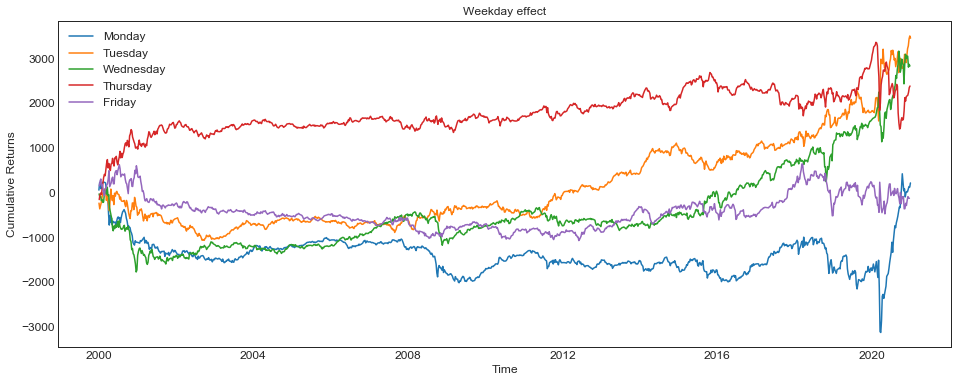

In [166]:
b = mon_nq['Date']
a = mon_nq['Cum_Sum']

y = tue_nq['Date']
x = tue_nq['Cum_Sum']

d = wed_nq['Date']
c = wed_nq['Cum_Sum']

l = thu_nq['Date']
k = thu_nq['Cum_Sum']

u = fri_nq['Date']
t = fri_nq['Cum_Sum']

fig = plt.figure(figsize=(16, 6))
plt.plot(b, a, label="Monday")
plt.plot(y, x, label="Tuesday")
plt.plot(d, c, label="Wednesday")
plt.plot(l, k, label="Thursday")
plt.plot(u, t, label="Friday")

plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Weekday effect')
plt.legend(loc = 2)

plt.show()

In [194]:
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# formattting for seasonal analysis
large = 22; med = 16; small = 12
params = {'legend.fontsize': small,
          'figure.figsize': (10, 10),
          'axes.labelsize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': small}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")


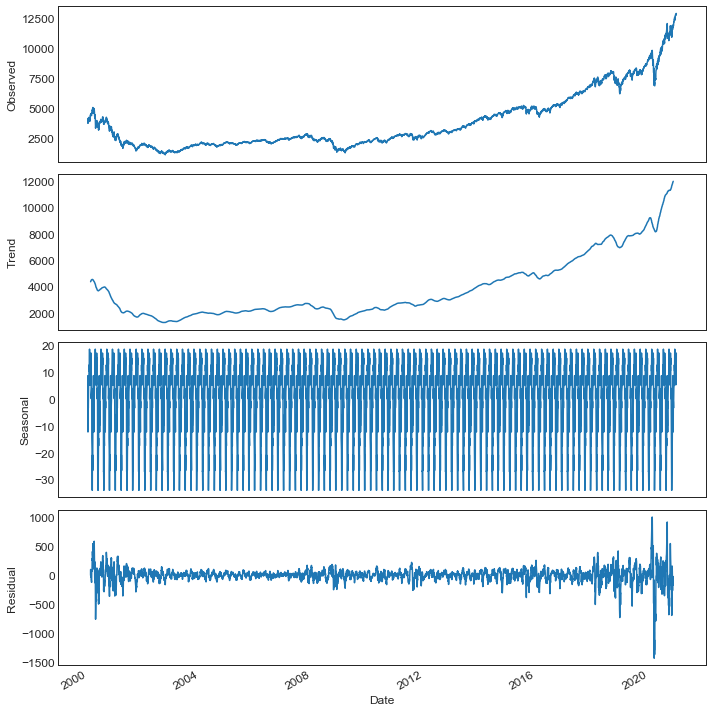

In [199]:
# Import Data for seasonal analysis
df = nq[['Date', 'Close']]
dates = df['Date']
df.set_index(dates, inplace=True)
df = df.drop(['Date'], axis=1)

# Decompose 
result = seasonal_decompose(df, model='additive', freq=52) # freq is for weekly, 12 for monthly

# Plot
result.plot()#.suptitle('Time Series Decomposition of BN Weekly Sales')
plt.show()

In [203]:
# get seasonal ouput
data_out = pd.DataFrame(result.trend)
data_out['Seasonal'] = result.seasonal
data_out['Residual'] = result.resid
data_out.to_csv('Seasonal Analysis Results.csv')
